# **Assignment 10**

In [8]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts

#plotly or other graphing library
import plotly.express as px


In [10]:
# Load datasets here once and assign to variables iris and boston

iris = ds.load_iris()

**Q1** 

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [18]:
# Without defining a function
#df = pd.DataFrame(iris.data, columns=iris.feature_names)
#target_names = iris.target_names
#print(df.head())
#print(target_names)

#* Wrapping it all up in a function
def first_five_rows(dataset):
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    target_names = dataset.target_names
    return df.head(), target_names

# To print both parts with one command
print(first_five_rows(iris))

# Using separate print statements
#print(first_five_rows(iris)[0])
#print(first_five_rows(iris)[1])

(   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2, array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))


**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in 
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [122]:
def knn_predict(dataset, new_observations, k=5):
    knn = KNN(n_neighbors=k)
    knn.fit(dataset.data, dataset.target)
    return dataset.target_names[knn.predict(new_observations)]

# Test the function with these randomly chosen new observations
new_observations = np.array([[5.1, 3.5, 1.4, 0.2], [5.9, 3., 5.1, 1.8]])
print(knn_predict(iris, new_observations))

['setosa' 'virginica']


**Q3** 15 pts

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [121]:
def knn_accuracy(dataset, split, neighbors):
    X_train, X_test, y_train, y_test = tts(dataset.data, dataset.target, test_size=split)
    knn = KNN(n_neighbors=neighbors)
    knn.fit(X_train, y_train)
    return knn.score(X_test, y_test)

# Test the function with these randomly chosen parameters
split = 0.3
neighbors = 4
print(knn_accuracy(iris, split, neighbors))


1.0


**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

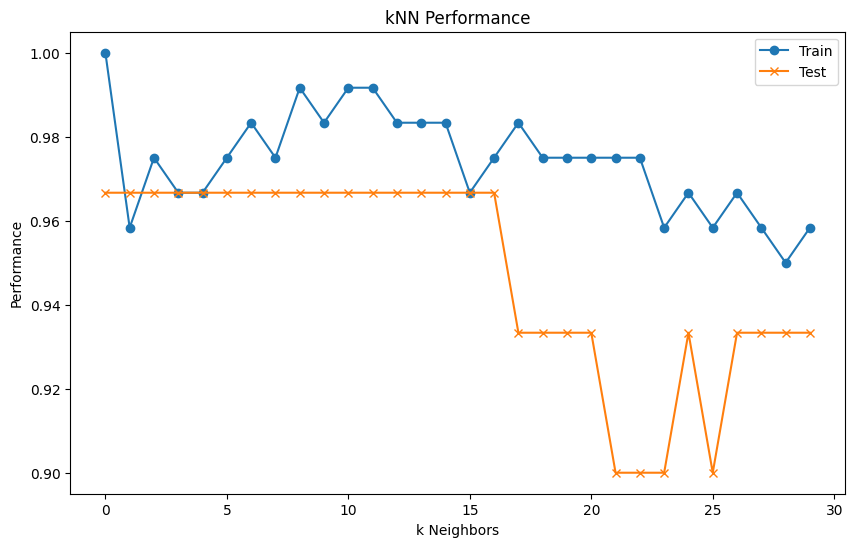

In [205]:
#* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

def knn_overfit_underfit(dataset, split, neighbors_max):
    X_train, X_test, y_train, y_test = tts(dataset.data, dataset.target, test_size=split, random_state=1125)
    train_scores = []
    test_scores = []
    for i in range(1, neighbors_max+1):
        knn = KNN(n_neighbors=i)
        knn.fit(X_train, y_train)
        train_scores.append(knn.score(X_train, y_train))
        test_scores.append(knn.score(X_test, y_test))
    return train_scores, test_scores

# Test the function 
split = 0.2
neighbors_max = 30
train, test = knn_overfit_underfit(iris, split, 30)

plt.figure(figsize=(10,6))
plt.plot(train, marker='o', label='Train')
plt.plot(test, marker='x', label='Test')
plt.xlabel('k Neighbors')
plt.ylabel('Performance')
plt.title('kNN Performance')
plt.legend()
plt.show()

**Q5** 10 pts

**Data set: Boston**


* Load sklearn's Boston data into a DataFrame (only the data and feature_name as column names)

* Load sklearn's Boston target values into a separate DataFrame

* Return back the average of AGE, average of the target (median value of homes or MEDV), and the target as NumPy values 

**Q6** 

**Data set: Boston**

* In the Boston dataset, the feature PTRATIO refers to pupil teacher ratio.

* Using a matplotlib scatter plot, plot MEDV median value of homes as y-axis and PTRATIO as x-axis

* Return back PTRATIO as a NumPy array

**Q7**

**Data set: Boston**

* Create a regression model for MEDV / PTRATIO and display a chart showing the regression line using matplotlib


* Use np.linspace() to generate prediction X values from min to max PTRATIO

* Return back the regression prediction space and regression predicted values

* Make sure to labels axes appropriately